In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [2]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1EHa0Vo_HzlXRZyGWkjDC0Hhj3pXH6HvBoFtAIpnqeVk/edit#gid=0'

In [3]:
url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

In [4]:
df = pd.read_csv(url)

In [26]:
df.head()

,Week,Category,Customers,Contacts,Accepted Contacts,Revenue
0,1,Bathroom Remodel,542,1666,748,41973
1,1,Concrete Installation,1266,3769,1358,53066
2,1,DJ,1575,3877,2265,47437
3,1,Electrical and Wiring Repair,1360,4725,2452,38401
4,1,Exterior Painting,803,2797,1267,56759


In [50]:
df.to_csv('forS.csv', index=False)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Week               260 non-null    int64 
 1   Category           260 non-null    object
 2   Customers          260 non-null    int64 
 3   Contacts           260 non-null    int64 
 4   Accepted Contacts  260 non-null    int64 
 5   Revenue            260 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.3+ KB


In [28]:
df.Revenue.describe()

count       260.000000
mean      59435.726923
std       33267.492678
min       18239.000000
25%       38710.750000
50%       50739.500000
75%       67737.000000
max      184214.000000
Name: Revenue, dtype: float64

In [7]:
df['Category'].unique()

array(['Bathroom Remodel', 'Concrete Installation', 'DJ',
       'Electrical and Wiring Repair', 'Exterior Painting',
       'Fence and Gate Installation', 'Floor Installation or Replacement',
       'General Contracting', 'Handyman', 'House Cleaning',
       'Interior Painting', 'Junk Removal',
       'Local Moving (under 50 miles)', 'Outdoor Landscaping and Design',
       'Personal Training', 'Property Management',
       'Roof Installation or Replacement', 'Tree Trimming and Removal',
       'Wedding and Event Catering', 'Wedding and Event Photography'],
      dtype=object)

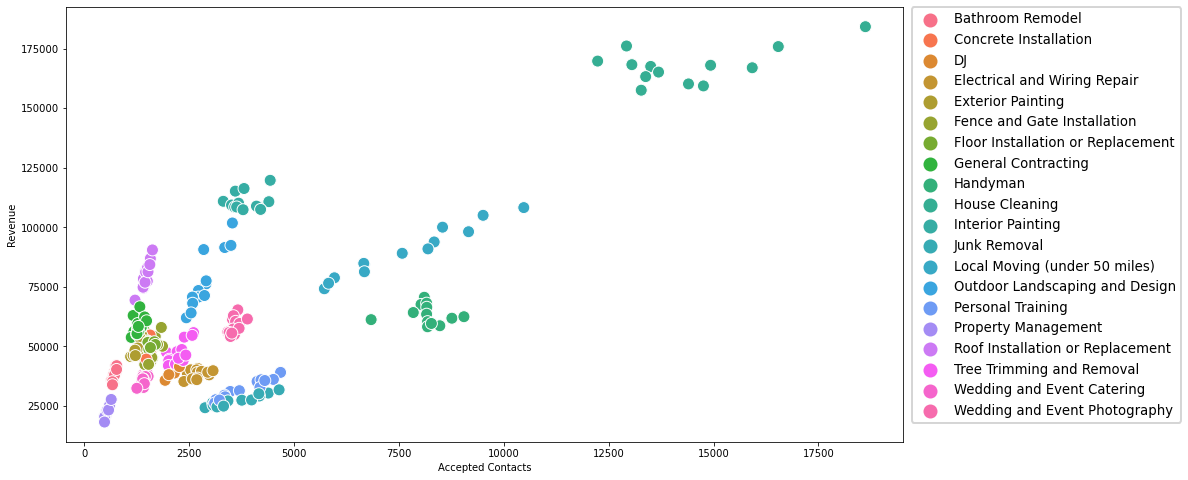

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper lanscape
fig.set_size_inches(15, 8)
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.6})
sns.scatterplot(data=df, x="Accepted Contacts", y="Revenue", hue="Category")
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
plt.show()

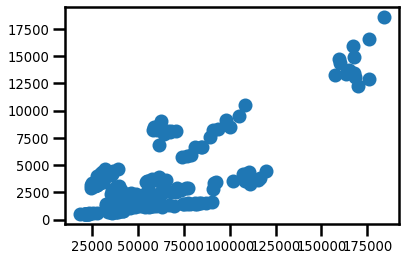

In [9]:
plt.scatter('Revenue', 'Accepted Contacts', data=df)
plt.show()

In [21]:
fig = px.scatter(df, x="Accepted Contacts", y="Revenue", color="Category", trendline="ols")
fig.show()

In [22]:
fig1 = px.scatter(df, x="Contacts", y="Revenue", color="Category", trendline="ols")
fig1.show()

In [23]:
fig2 = px.scatter(df, x="Customers", y="Revenue", color="Category", trendline="ols")
fig2.show()

In [25]:
df_1 = df.groupby("Week").sum("Revenue").reset_index()
fig3 = px.line(df_1.sort_values(by = "Week"), x="Week", y="Revenue")
fig3.show()

In [33]:
df_4 = df[df['Category'] == 'Handyman']
fig4 = px.line(df_4.sort_values(by = "Week"), x="Week", y="Revenue")
fig4.show()

In [34]:
fig5 = px.line(df_4.sort_values(by = "Week"), x="Week", y="Customers")
fig5.show()

In [35]:
fig6 = px.line(df_4.sort_values(by = "Week"), x="Week", y="Contacts")
fig6.show()

In [36]:
px.line(df_4.sort_values(by = "Week"), x="Week", y="Revenue")
px.line(df_4.sort_values(by = "Week"), x="Week", y="Customers")
px.line(df_4.sort_values(by = "Week"), x="Week", y="Contacts")
px.line(df_4.sort_values(by = "Week"), x="Week", y="Accepted Contacts")
px.show()

AttributeError: module 'plotly.express' has no attribute 'show'

In [ ]:
df_1 = df.groupby("Week").sum("Contacts").reset_index()
fig3 = px.line(df_1.sort_values(by = "Week"), x="Week", y="Revenue")
fig3.show()

In [ ]:
df_1 = df.groupby("Week").sum("Accepted Contacts").reset_index()
fig3 = px.line(df_1.sort_values(by = "Week"), x="Week", y="Revenue")
fig3.show()

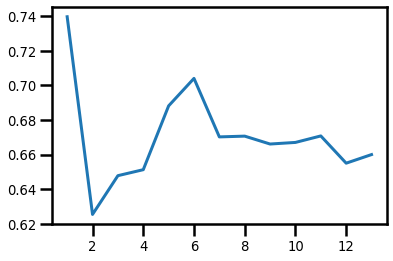

In [49]:
# plt.plot(df_4["Week"], df_4['Revenue'], label = 'Revenue')
plt.plot(df_4["Week"], df_4['Cust_AcceptContacts'], label = 'Rate')
# plt.plot(df_4["Week"], df_4['Customers'], label = 'Customers')
# plt.plot(df_4["Week"], df_4['Contacts'], label = 'Contacts')
# plt.plot(df_4["Week"], df_4['Accepted Contacts'], label = 'Accepted Contacts')
plt.show()

In [44]:
df_4 = df_4.copy()

In [54]:
df_4['Cust_Contacts'] = df_4['Contacts']/df_4['Customers']
df_4['Contacts_AccpContact'] = df_4['Accepted Contacts']/df_4['Contacts']

In [55]:
df_4

,Week,Category,Customers,Contacts,Accepted Contacts,Revenue,Cust_AcceptContacts,Cust_Contacts,Contacts_AccpContact
8,1,Handyman,5055,14377,6834,61227,0.739684,2.844115,0.475343
28,2,Handyman,5067,15062,8102,70622,0.625401,2.972568,0.537910
48,3,Handyman,5198,15297,8024,67616,0.647807,2.942863,0.524547
68,4,Handyman,5313,15661,8158,68139,0.651263,2.947676,0.520912
88,5,Handyman,5616,16375,8161,66416,0.688151,2.915776,0.498382
108,6,Handyman,5519,15827,7839,64208,0.704044,2.867730,0.495293
128,7,Handyman,5467,16431,8157,63505,0.670222,3.005487,0.496440
148,8,Handyman,5486,17286,8180,60382,0.670660,3.150930,0.473215
168,9,Handyman,5448,17052,8179,58229,0.666096,3.129956,0.479650
188,10,Handyman,5651,17760,8472,58661,0.667021,3.142807,0.477027


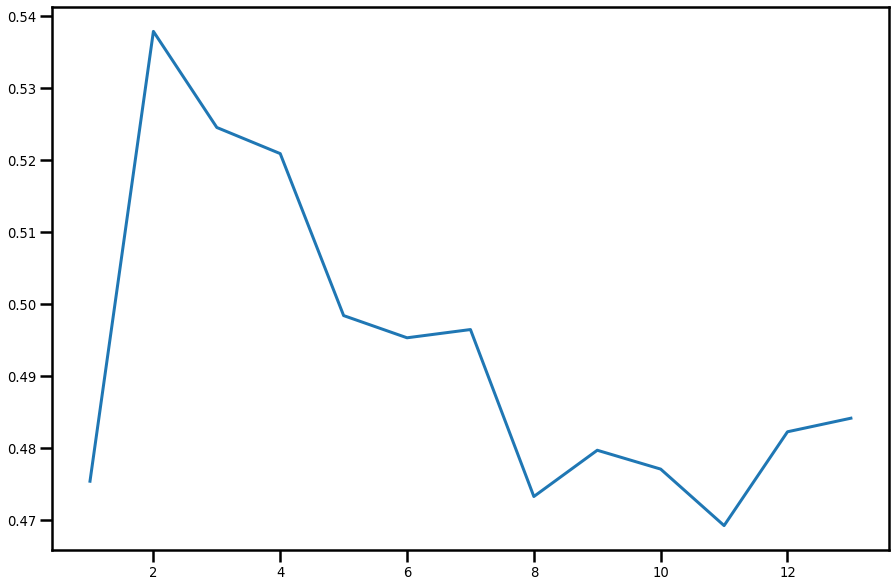

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
# plt.plot(df_4["Week"], df_4['Revenue'], label = 'Revenue')
# plt.plot(df_4["Week"], df_4['Cust_Contacts'], label = 'Rate')
plt.plot(df_4["Week"], df_4['Contacts_AccpContact'], label = 'Customers')
# plt.plot(df_4["Week"], df_4['Contacts'], label = 'Contacts')
# plt.plot(df_4["Week"], df_4['Accepted Contacts'], label = 'Accepted Contacts')
plt.show()